In [3]:
# Caz - PHONE
# Metoda noua Tree Decision Classifier                 CART - classification and Regression Trees 
# comparam cu metoda KNN si Logistic Regresion 

# facem si acuratetea pe X antrenare  -CEVA NOU, pentru a vedea care algoritm invata mai bine si nu nu este disspus spre overfiting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier        # Algoritmul de copac
from sklearn.linear_model import LogisticRegression     # Algoritmul de Logistic regresion 
from sklearn.neighbors import KNeighborsClassifier      # algoritmul KNN

from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split 

In [11]:
t = pd.read_csv('train.csv')   # incarcam datele din fisier in variabila t
print (t)
print (t.info())         # info descpre fiecare tip de date din coloana
print (t.isna().sum())   # sa vedem daca sunt valori lipsa

# print (t.shape) 
# print (t.sum)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [12]:
t = t.sample(frac=1)   # am amestecat rindurile, inregistrarile 
t

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
687,768,0,0.5,1,0,0,19,0.9,159,2,...,637,991,1145,19,1,7,0,0,1,0
1538,1070,1,3.0,0,9,0,19,0.8,160,7,...,90,1614,2647,14,13,20,0,1,0,2
999,1777,1,3.0,0,3,0,20,0.6,188,6,...,511,616,3868,5,1,7,0,1,1,3
1311,643,1,0.7,1,3,1,23,0.8,156,1,...,314,1400,2096,13,6,2,1,0,0,1
297,1329,1,1.0,0,1,0,52,0.9,181,6,...,1053,1458,1228,8,6,6,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,796,0,0.5,0,2,0,12,0.5,114,1,...,174,518,1075,7,3,2,0,1,0,0
1582,1171,1,1.7,1,2,0,19,0.3,167,7,...,248,755,263,6,5,8,0,0,0,0
869,1236,1,2.8,0,6,1,32,0.3,143,4,...,492,1403,942,16,12,14,1,1,1,0
1950,1561,1,1.6,1,1,1,27,0.8,174,3,...,662,874,1205,12,7,3,1,1,0,1


In [16]:
X = t.drop (['price_range'], axis = 1).values        # separam datele in X datele de analizat si Y rezultatele
y= t['price_range'].values


X_antrenat,X_testat,y_antrenat,y_testat = train_test_split (X,y,random_state = 42 )  # impartim datele pe antenare si testare



 **************************************************************    Modelul Decision Tree Clasifier  


 Acuratetea pe X testat =  0.84

 Acuratetea pe X antrenat  1.0

 Diferenta dintre acuratetea pe  antrenare si acuratetea pe testare =  0.16000000000000003

Matricea de confuzie 



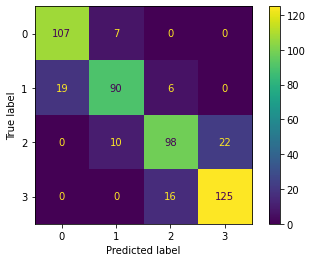

In [37]:
# Modelul 1  Decision Tree 

model = DecisionTreeClassifier(criterion = 'entropy')   # alegem modelul de copac, el memoreaza toate deciziile in copac 
                                                       # tine minte clasa fiecarul punct,  este dispus spre overfiting 
model.fit (X_antrenat, y_antrenat)                     # antrenam modelul pe Decision Tree

prezicerea = model.predict (X_testat )                  # facem prezicerea pe X_testat ca de obicei
prezicerea_a = model.predict (X_antrenat)              # mai aacem inca o predictie pe X antrenat  SUPLIMENTAR

print  ('\n **************************************************************    Modelul Decision Tree Clasifier  \n')
#print ('\nPrezicerea pe X testat  \n\n', prezicerea)
#print ('\nPrezicerea pe X antrenat\n\n', prezicerea_a) 

acuratetea = accuracy_score(prezicerea, y_testat)             #  calculam acuratetea pentru cele 2 preziceri 
print ('\n Acuratetea pe X testat = ', acuratetea)

acuratetea_a =accuracy_score(prezicerea_a, y_antrenat)   # facem 2 preziceri pe X antrenat, si pe X testat 
                                                         # pentru a dovedi eficienta algoritmului TRee
print ('\n Acuratetea pe X antrenat ', acuratetea_a)  
print ('\n Diferenta dintre acuratetea pe  antrenare si acuratetea pe testare = ', acuratetea_a-acuratetea )
print ('\nMatricea de confuzie \n\n ', plot_confusion_matrix(model, X_testat, y_testat))


**********************************************************************   Modelul KNN 
 

 Acuratetea pe X testat =  0.914

 Acuratetea pe X antrenat  0.9526666666666667

 Diferenta dintre acuratetea pe  antrenare si acuratetea pe testare =  0.03866666666666663

Matricea de confuzie 



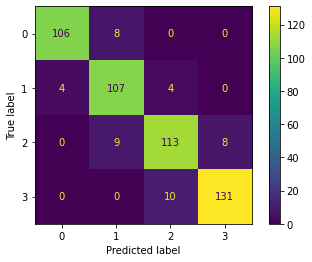

In [38]:
# Modelul 2  Knn 

model = KNeighborsClassifier ()           # alegem modelul KNN

model.fit (X_antrenat, y_antrenat)            # antrenam modelul pe Decision Tree

prezicerea = model.predict (X_testat )       # facem prezicerea pe X_testat ca de obicei

prezicerea_a = model.predict (X_antrenat)     # mai facem inca o predictie pe X antrenat  SUPLIMENTAR

print ('**********************************************************************   Modelul KNN \n ')
#print ('\nPrezicerea pe X testat  \n\n', prezicerea)
#print ('\nPrezicerea pe X antrenat\n\n', prezicerea_a) 

acuratetea = accuracy_score(prezicerea, y_testat)             #  calculam acuratetea pentru cele 2 preziceri 
print ('\n Acuratetea pe X testat = ', acuratetea)

acuratetea_a =accuracy_score(prezicerea_a, y_antrenat)   # facem 2 preziceri pe X antrenat, si pe X testat 
                                                         # pentru a dovedi eficienta algoritmului KNN
print ('\n Acuratetea pe X antrenat ', acuratetea_a) 
print ('\n Diferenta dintre acuratetea pe  antrenare si acuratetea pe testare = ', acuratetea_a-acuratetea )

print ('\nMatricea de confuzie \n\n ', plot_confusion_matrix(model, X_testat, y_testat))


*********************************************************************   Modelul Logistic Regresion 
 

 Acuratetea pe X testat =  0.776

 Acuratetea pe X antrenat  0.7933333333333333

 Diferenta dintre acuratetea pe  antrenare si acuratetea pe testare =  0.01733333333333331

Matricea de confuzie 



c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


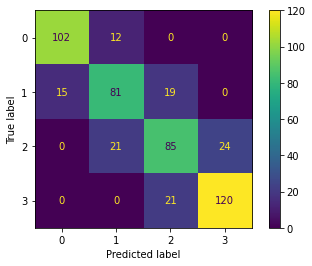

In [40]:
# Modelul 3 Logistic Regresion 

model = LogisticRegression (max_iter=2000000)   # alegem modelul Logistic Regression, face iteratii, nr il dam noi 1000 sau > 1000 

model.fit (X_antrenat, y_antrenat)            # antrenam modelul pe Decision Tree

prezicerea = model.predict (X_testat )       # facem prezicerea pe X_testat ca de obicei

prezicerea_a = model.predict (X_antrenat)     # mai facem inca o predictie pe X antrenat  SUPLIMENTAR

print ('*********************************************************************   Modelul Logistic Regresion \n ')
#print ('\nPrezicerea pe X testat  \n\n', prezicerea)
#print ('\nPrezicerea pe X antrenat\n\n', prezicerea_a) 

acuratetea = accuracy_score(prezicerea, y_testat)             #  calculam acuratetea pentru cele 2 preziceri 
print ('\n Acuratetea pe X testat = ', acuratetea)

acuratetea_a =accuracy_score(prezicerea_a, y_antrenat)   # facem 2 preziceri pe X antrenat, si pe X testat 
                                                         # pentru a dovedi eficienta algoritmului LogisticRegresion 
print ('\n Acuratetea pe X antrenat ', acuratetea_a) 

print ('\n Diferenta dintre acuratetea pe  antrenare si acuratetea pe testare = ', acuratetea_a-acuratetea )

print ('\nMatricea de confuzie \n\n ', plot_confusion_matrix(model, X_testat, y_testat))